### Computer Vision Final Project
Michael Edenzon and Griffin Hiers

In [25]:
import CVFunctions
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# load template images
filenames = os.listdir('dataset')
vfilenames = os.listdir('validationset')
images = []
vimages = []

for filename in filenames:
    images.append(cv2.imread('dataset/' + filename,0))
for filename in vfilenames:
    vimages.append(cv2.imread('vdataset/' + filename + '.jpg',0))


TypeError: Image data can not convert to float

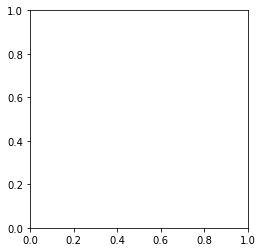

In [26]:

def findPossiblePlates(image):
    originalImage = image
    IMG_SHAPE = originalImage.shape
    img = originalImage
    img = cv2.GaussianBlur(img, (19,11), 100)
    img = thresh(img,85, 255, cv2.THRESH_BINARY)
    contours = findContours(img)
    largeContours = getLargeContours(contours,originalImage.shape)
    blankImage4 = np.zeros(IMG_SHAPE)
    possiblePlateContours = []
    
    for i in range(len(largeContours)):
        x,y,w,h = cv2.boundingRect(largeContours[i])
        aspect = aspectRatio(w,h)
        if (aspect > 1) and (aspect < 3):
            cv2.rectangle(blankImage4,(x,y),(x+w,y+h),(0.9,0.7,0.0),4)
            possiblePlateContours.append(largeContours[i])

    blankImage5 = np.zeros(originalImage.shape)
    
    for contour in possiblePlateContours:
        x,y,w,h = cv2.boundingRect(contour)
        blankImage5[y:y+h,x:x+w] = originalImage[y:y+h,x:x+w]

    return blankImage5

#for i in range(len(images)):
    #draw(findPossiblePlates(images[i]))
    
draw(vimages[0])